# Predicting Hospital Readmissions

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Importing the Data

In [137]:
df_raw= pd.read_csv('hospital_readmissions.csv')

In [138]:
df=df_raw.copy()

In [139]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## Data Wrangling

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [141]:
df.shape

(25000, 17)

In [142]:
df.duplicated().sum()

0

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,25000.0,4.45332,3.001470,1.0,2.0,4.0,6.0,14.0
n_lab_procedures,25000.0,43.24076,19.818620,1.0,31.0,44.0,57.0,113.0
n_procedures,25000.0,1.35236,1.715179,0.0,0.0,1.0,2.0,6.0
n_medications,25000.0,16.25240,8.060532,1.0,11.0,15.0,20.0,79.0
n_outpatient,25000.0,0.36640,1.195478,0.0,0.0,0.0,0.0,33.0
n_inpatient,25000.0,0.61596,1.177951,0.0,0.0,0.0,1.0,15.0
n_emergency,25000.0,0.18660,0.885873,0.0,0.0,0.0,0.0,64.0


In [144]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

age                  0.0
time_in_hospital     0.0
n_lab_procedures     0.0
n_procedures         0.0
n_medications        0.0
n_outpatient         0.0
n_inpatient          0.0
n_emergency          0.0
medical_specialty    0.0
diag_1               0.0
diag_2               0.0
diag_3               0.0
glucose_test         0.0
A1Ctest              0.0
change               0.0
diabetes_med         0.0
readmitted           0.0
dtype: float64

In [145]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['time_in_hospital',
 'n_lab_procedures',
 'n_procedures',
 'n_medications',
 'n_outpatient',
 'n_inpatient',
 'n_emergency']

In [146]:
from scipy.stats import skew
for col in numeric:
    print(f'Skewness for column {col} is {df[col].skew()}')

Skewness for column time_in_hospital is 1.1089046215797012
Skewness for column n_lab_procedures is -0.23867243659162238
Skewness for column n_procedures is 1.300571775017207
Skewness for column n_medications is 1.316139001531739
Skewness for column n_outpatient is 7.302605309338813
Skewness for column n_inpatient is 3.2546341152152656
Skewness for column n_emergency is 24.530151688037062


## Hypothesis Testing

In [147]:
columns=df.columns
columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [148]:
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med',
 'readmitted']

In [149]:
for col in not_numeric:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

age 
--------------------
 Unique :6
--------------------
--------------------
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: age, dtype: int64 

medical_specialty 
--------------------
 Unique :7
--------------------
--------------------
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: medical_specialty, dtype: int64 

diag_1 
--------------------
 Unique :8
--------------------
--------------------
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: diag_1, dtype: int64 

diag_2 
--------------------
 Unique :8
--------------------
--------------------
Other              9056
Circulatory        8134
Dia

In [150]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['time_in_hospital',
 'n_lab_procedures',
 'n_procedures',
 'n_medications',
 'n_outpatient',
 'n_inpatient',
 'n_emergency']

## ANOVA Test

In [151]:
from scipy.stats import f_oneway

In [152]:
def perform_Anova_test_regression(data_frame, list_of_column, Target_column):
    
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Categorical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalNum=[]
    for col in list_of_column:
        # Running the one-way anova test 
        # Assumption(H0) is that variable are NOT correlated

        CategoryGroupLists=data_frame.groupby(Target_column)[col].apply(list)
        #print(CategoryGroupLists)

        # Performing the ANOVA test
        # We accept the Assumption(H0) only when P-Value &gt; 0.05
        AnovaResults = f_oneway(*CategoryGroupLists)
        pvalNum.append(AnovaResults[1])
        #print('P-Value for Anova is: ', AnovaResults[1])
        
    dict={'P-Value of the Anova_Test':pvalNum}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the Anova_Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    return PvalueTable

In [153]:
perform_Anova_test_regression(df,numeric,'readmitted')

,P-Value of the Anova_Test,Decision
time_in_hospital,8.848708e-12,Reject Null Hypothesis
n_lab_procedures,1.845898e-07,Reject Null Hypothesis
n_procedures,2.007615e-12,Reject Null Hypothesis
n_medications,5.493484e-09,Reject Null Hypothesis
n_outpatient,1.001795e-51,Reject Null Hypothesis
n_inpatient,3.948076e-253,Reject Null Hypothesis
n_emergency,1.115309e-49,Reject Null Hypothesis


## Chi-Square Test

In [154]:
from scipy.stats import chi2_contingency

In [155]:
def perform_ChiSquare_test(data_frame, list_of_column, Target_column):  
        
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Categorical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalCat=[]
    
    for col in list_of_column:
        CrosstabResult=pd.crosstab(index=df[col],columns=df[Target_column])
    #print(CrosstabResult)    

    # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult)
        pvalCat.append(ChiSqResult[1])

    # P-Value is the Probability of H0 being True
    # If P-Value&gt;0.05 then only we Accept the assumption(H0)\
    #print('The P-Value of the ChiSq Test is:', ChiSqResult[1]))

    dict={'P-Value of the ChiSq Test':pvalCat}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the ChiSq Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    return PvalueTable

In [156]:
perform_ChiSquare_test(df,not_numeric,'readmitted')

,P-Value of the ChiSq Test,Decision
age,2.452866e-09,Reject Null Hypothesis
medical_specialty,2.585775e-16,Reject Null Hypothesis
diag_1,1.368110e-15,Reject Null Hypothesis
diag_2,2.495156e-05,Reject Null Hypothesis
diag_3,9.633361e-08,Reject Null Hypothesis
glucose_test,2.072100e-02,Reject Null Hypothesis
A1Ctest,6.033471e-04,Reject Null Hypothesis
change,9.098888e-12,Reject Null Hypothesis
diabetes_med,1.009671e-22,Reject Null Hypothesis
readmitted,0.000000e+00,Reject Null Hypothesis


## Multicollinearity Check

<AxesSubplot:>

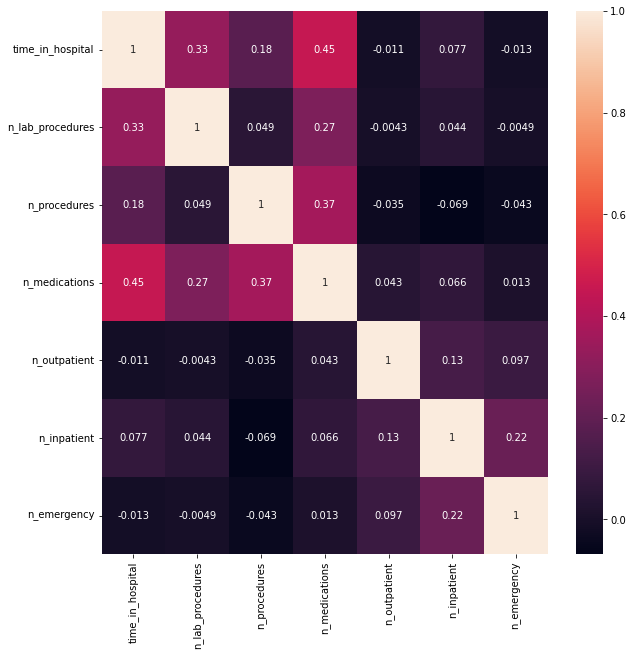

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method ='pearson'),annot=True)

In [158]:
df_numeric=df[numeric]

In [159]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    '''
    Take the inputs as dataframe and calculate the VIF.
    Returns Data frame with VIF value and respective column name.
    
        Parameters:
                X(Data Frame):Pandas Data Farame
        
        Returns:
                vif(Data Frame): Data frame with VIF value and respective column name.
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF'))

In [160]:
calc_vif(df_numeric)

,variables,VIF
6,n_emergency,1.103072
4,n_outpatient,1.116581
5,n_inpatient,1.362017
2,n_procedures,1.901006
0,time_in_hospital,4.252198
1,n_lab_procedures,4.574212
3,n_medications,6.278192


In [161]:
def check_muticolinearity(dataframe,threshold = 0.9):
    
    '''
    Take the inputs as dataframe and threshold of correlation.
    Print the number of column and respective column names to be droped.
    
        Parameters:
                dataframe(Data Frame):Pandas Data Farame
        
        Returns:
                Print the number of column and respective column names to be droped.
    
    '''
    corr_matrix =dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    if len(to_drop)>1:
        print(f'There are {len(to_drop)} columns to remove. And they are {to_drop}')
    else:
         print(f'There are {len(to_drop)} columns to remove.') 

In [162]:
check_muticolinearity(df_numeric)

There are 0 columns to remove.


## EDA

In [163]:
numeric_new=[]
for label,content in df_raw.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_new.append(label)
numeric_new

['time_in_hospital',
 'n_lab_procedures',
 'n_procedures',
 'n_medications',
 'n_outpatient',
 'n_inpatient',
 'n_emergency']

In [164]:
numericdf=df_raw[numeric_new]

In [165]:
#sns.pairplot(df,hue='readmitted')

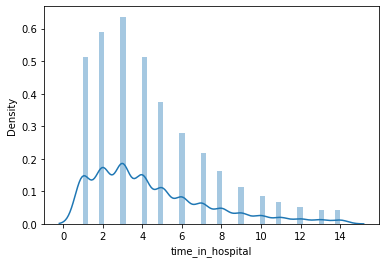

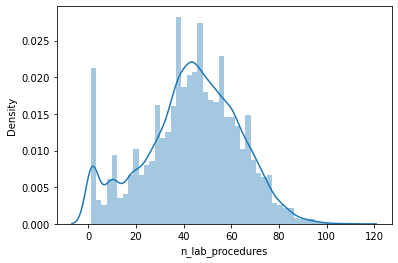

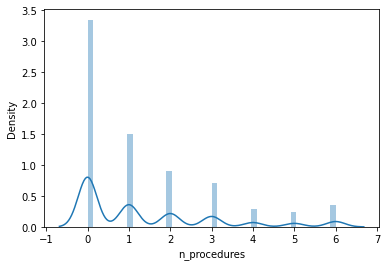

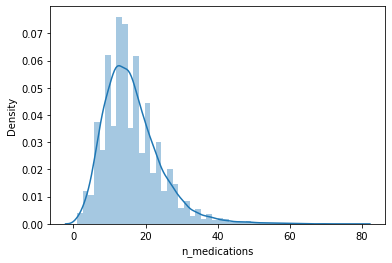

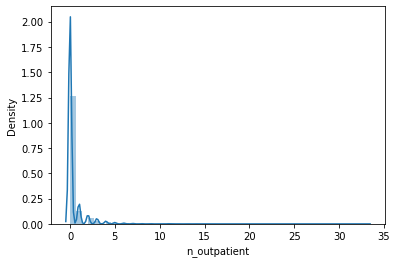

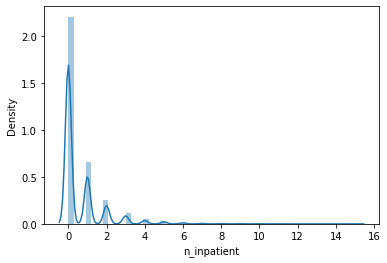

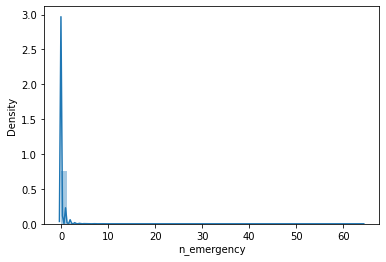

In [166]:
for i in numericdf.columns:
    sns.distplot(numericdf[i])
    plt.show()

In [167]:
not_numeric_new=[]
for label,content in df_raw.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric_new.append(label)
not_numeric_new

['age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med',
 'readmitted']

In [168]:
nonnumericdf=df_raw[not_numeric_new]

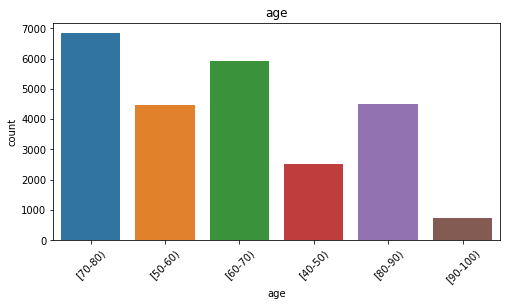

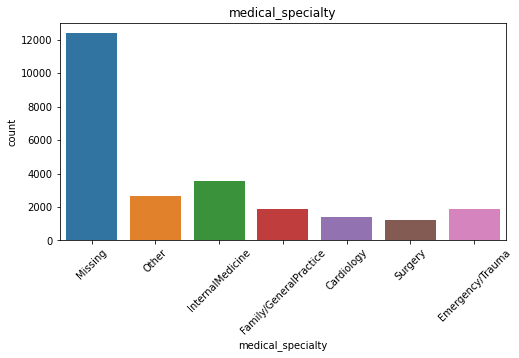

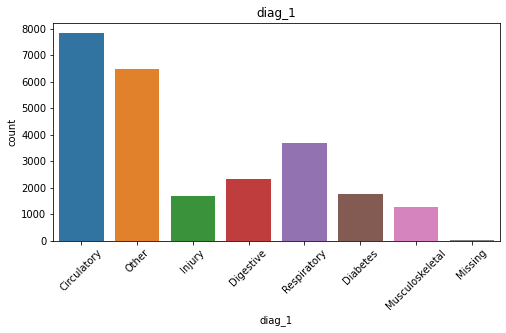

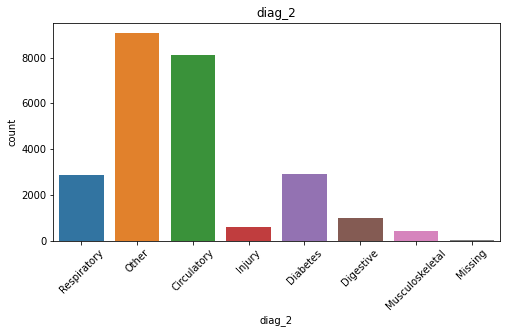

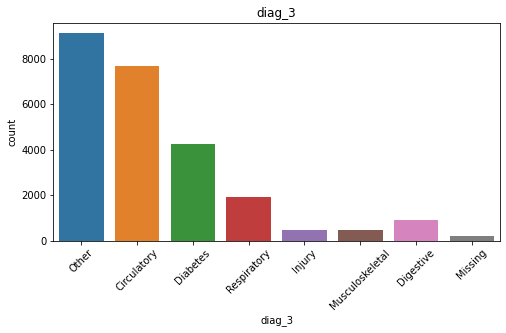

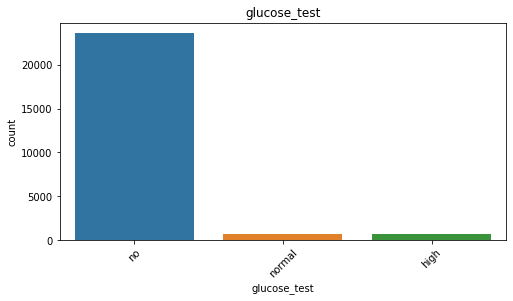

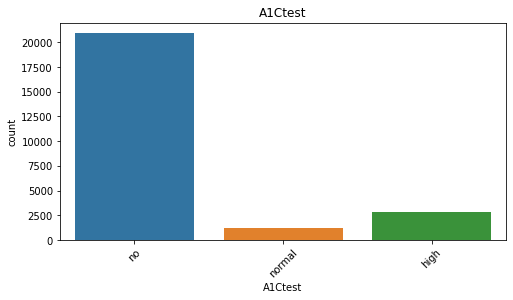

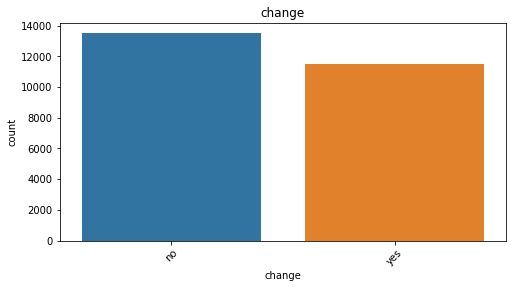

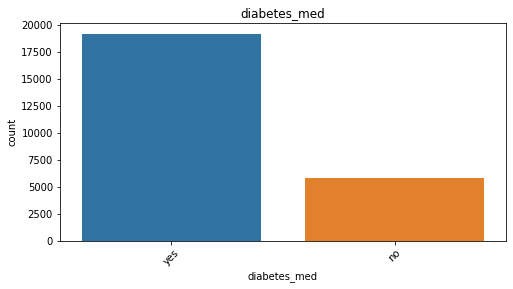

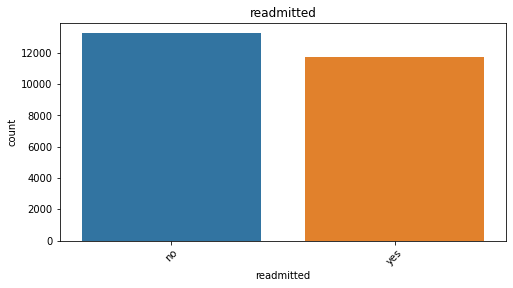

In [169]:
for col in not_numeric_new:
    plt.figure(figsize=(8,4))
    sns.countplot(x=nonnumericdf[col], data=nonnumericdf)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

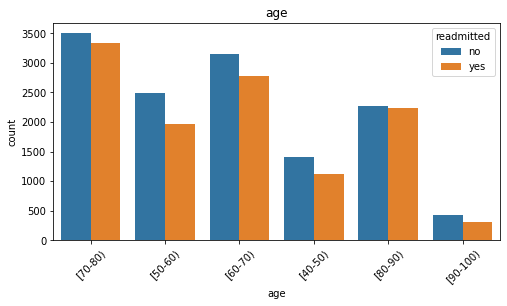

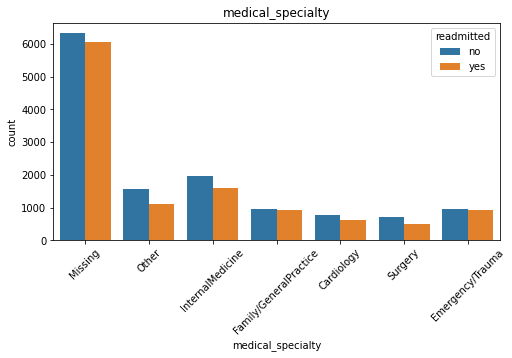

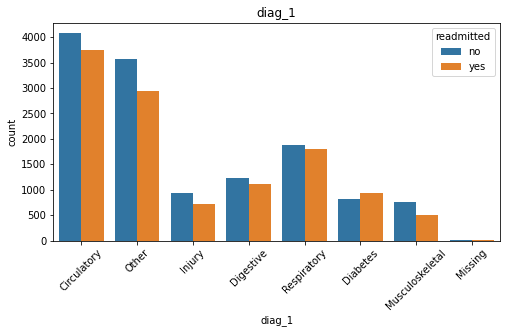

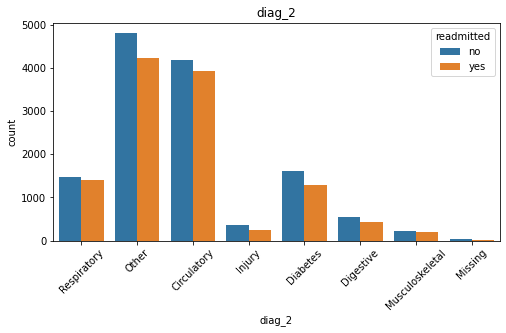

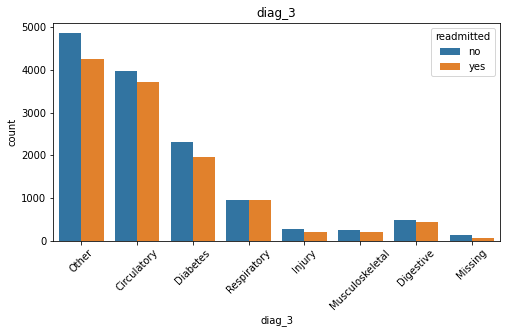

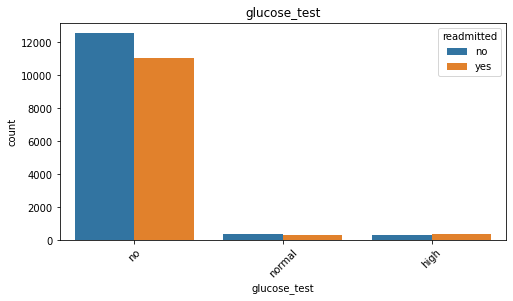

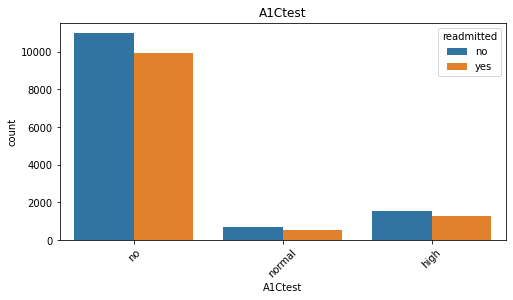

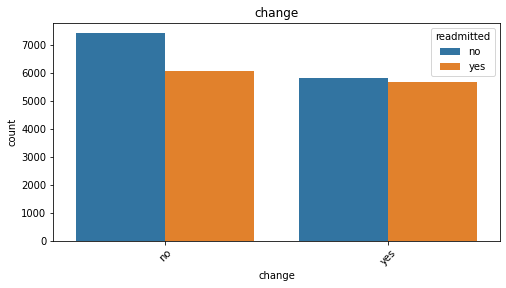

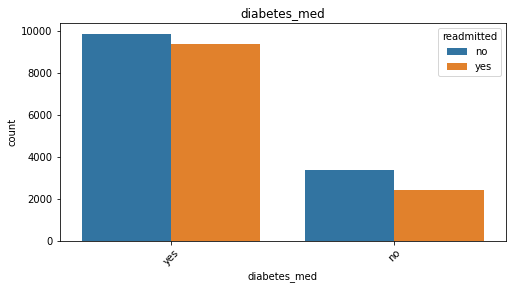

In [170]:
for col in not_numeric_new[:-1]:
    plt.figure(figsize=(8,4))
    sns.countplot(x=nonnumericdf[col], data=nonnumericdf,hue='readmitted')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [171]:
from scipy import stats

In [172]:
def probaplot(col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='red')
    
    plt.show()

Prob Plot of time_in_hospital


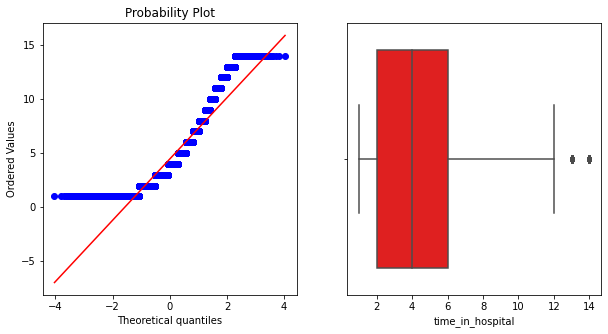

____________________________________________________________________________________________________ 

Prob Plot of n_lab_procedures


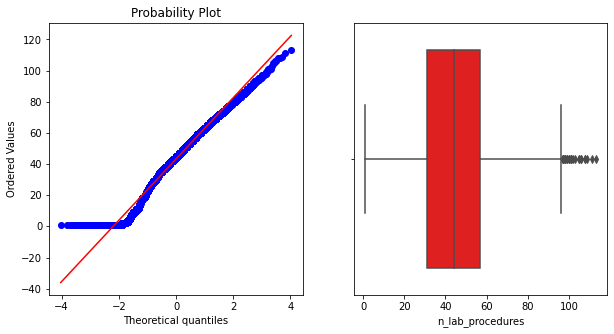

____________________________________________________________________________________________________ 

Prob Plot of n_procedures


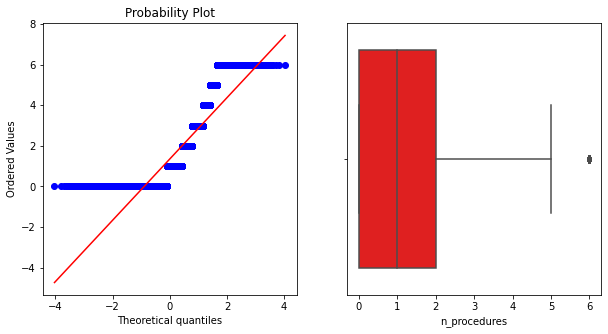

____________________________________________________________________________________________________ 

Prob Plot of n_medications


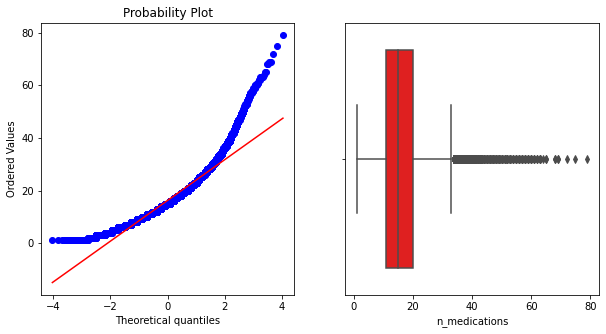

____________________________________________________________________________________________________ 

Prob Plot of n_outpatient


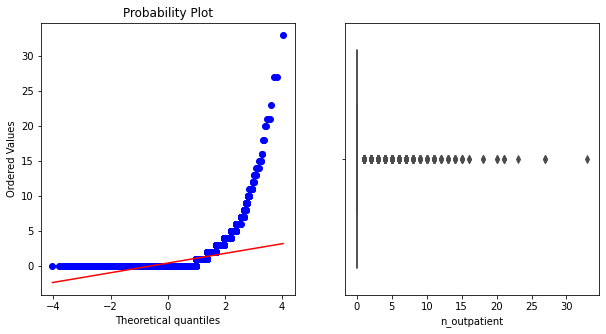

____________________________________________________________________________________________________ 

Prob Plot of n_inpatient


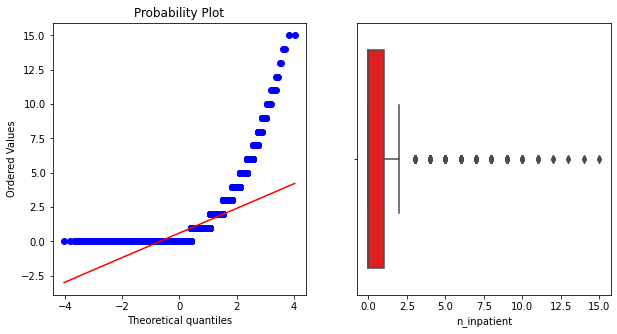

____________________________________________________________________________________________________ 

Prob Plot of n_emergency


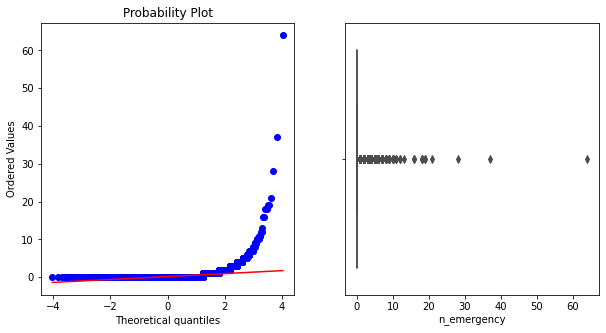

____________________________________________________________________________________________________ 



In [173]:
for i in numericdf.columns:
    print(f'Prob Plot of {i}')
    probaplot(i)
    print('_'*100,'\n')
    plt.show()

## Encoding

In [174]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [175]:
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med',
 'readmitted']

In [176]:
for col in not_numeric:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

age 
--------------------
 Unique :6
--------------------
--------------------
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: age, dtype: int64 

medical_specialty 
--------------------
 Unique :7
--------------------
--------------------
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: medical_specialty, dtype: int64 

diag_1 
--------------------
 Unique :8
--------------------
--------------------
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: diag_1, dtype: int64 

diag_2 
--------------------
 Unique :8
--------------------
--------------------
Other              9056
Circulatory        8134
Dia

In [177]:
df['medical_specialty'] = df['medical_specialty'].apply(lambda x: 'No' if x == 'Missing' else x)
df['diag_1'] = df['diag_1'].apply(lambda x: 'No' if x == 'Missing' else x)
df['diag_2'] = df['diag_2'].apply(lambda x: 'No' if x == 'Missing' else x)
df['diag_3'] = df['diag_3'].apply(lambda x: 'No' if x == 'Missing' else x)

In [178]:
df['medical_specialty'].unique()

array(['No', 'Other', 'InternalMedicine', 'Family/GeneralPractice',
       'Cardiology', 'Surgery', 'Emergency/Trauma'], dtype=object)

In [179]:
df['diag_1'].unique()

array(['Circulatory', 'Other', 'Injury', 'Digestive', 'Respiratory',
       'Diabetes', 'Musculoskeletal', 'No'], dtype=object)

In [180]:
df['diag_2'].unique()

array(['Respiratory', 'Other', 'Circulatory', 'Injury', 'Diabetes',
       'Digestive', 'Musculoskeletal', 'No'], dtype=object)

In [181]:
df['diag_3'].unique()

array(['Other', 'Circulatory', 'Diabetes', 'Respiratory', 'Injury',
       'Musculoskeletal', 'Digestive', 'No'], dtype=object)

### Label Encoding

In [182]:
def labelEncoding(col,encoder):
    df[col]=encoder.fit_transform(df[col])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print([le_name_mapping])

In [183]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [184]:
list_label=['change','diabetes_med','readmitted']

In [185]:
for col in list_label:
    labelEncoding(col,le)

[{'no': 0, 'yes': 1}]
[{'no': 0, 'yes': 1}]
[{'no': 0, 'yes': 1}]


### Ordinal Encoding

In [186]:
df['age'].unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [187]:
df['age']=df['age'].map({'[70-80)':4, '[50-60)':2, '[60-70)':3, '[40-50)':1, '[80-90)':5, '[90-100)':6})

In [188]:
df['age'].unique()

array([4, 2, 3, 1, 5, 6], dtype=int64)

In [189]:
df['glucose_test'].unique()

array(['no', 'normal', 'high'], dtype=object)

In [190]:
df['glucose_test']=df['glucose_test'].map({'no':0, 'normal':1, 'high':2})

In [191]:
df['A1Ctest'].unique()

array(['no', 'normal', 'high'], dtype=object)

In [192]:
df['A1Ctest']=df['A1Ctest'].map({'no':0, 'normal':1, 'high':2})

### One Hot Encoding

In [193]:
diag = 'Diabetes'

df['Diabetes_ind'] = (df['diag_1'].str.contains(diag) | df['diag_2'].str.contains(diag) | df['diag_3'].str.contains(diag)) * 1

In [194]:
df.drop(['medical_specialty','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [195]:
#df=pd.get_dummies(df,columns=['medical_specialty','diag_1','diag_2','diag_3'],drop_first=True)

In [196]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,diabetes_med,readmitted,Diabetes_ind
0,4,8,72,1,18,2,0,0,0,0,0,1,0,0
1,4,3,34,2,13,0,0,0,0,0,0,1,0,0
2,2,5,45,0,18,0,0,0,0,0,1,1,1,0
3,4,2,36,0,12,1,0,0,0,0,1,1,1,1
4,3,1,42,0,7,0,0,0,0,0,0,1,0,0


## Removing The Skewness

In [197]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['age',
 'time_in_hospital',
 'n_lab_procedures',
 'n_procedures',
 'n_medications',
 'n_outpatient',
 'n_inpatient',
 'n_emergency',
 'glucose_test',
 'A1Ctest',
 'change',
 'diabetes_med',
 'readmitted',
 'Diabetes_ind']

In [198]:
from scipy.stats import skew
for col in numeric:
    print(f'Skewness for column {col} is {df[col].skew()}')

Skewness for column age is -0.12617834094193964
Skewness for column time_in_hospital is 1.1089046215797012
Skewness for column n_lab_procedures is -0.23867243659162238
Skewness for column n_procedures is 1.300571775017207
Skewness for column n_medications is 1.316139001531739
Skewness for column n_outpatient is 7.302605309338813
Skewness for column n_inpatient is 3.2546341152152656
Skewness for column n_emergency is 24.530151688037062
Skewness for column glucose_test is 4.543494265604681
Skewness for column A1Ctest is 2.0917443579586
Skewness for column change is 0.16003944219954086
Skewness for column diabetes_med is -1.2773556090950322
Skewness for column readmitted is 0.11958030684081818
Skewness for column Diabetes_ind is 0.6220147744685712


In [199]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted',
       'Diabetes_ind'],
      dtype='object')

In [200]:
#Transforming all colimns that have noticeable skewness
transformCols = ['time_in_hospital','n_procedures',
                 'n_medications','n_outpatient','n_inpatient',
                 'n_emergency','glucose_test','A1Ctest','diabetes_med']

In [201]:
df_log = df.copy()

In [202]:
for feat in transformCols:
    #Add one to avoid INF values
    df_log[feat] = np.log(1+df[feat])
    
#Check how many INF readings we have in the data
np.isinf(df_log).sum()

#Note the high rates of INF readings in n_procedures, n_outpatient, n_inpatient and n_emergency

age                 0
time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
glucose_test        0
A1Ctest             0
change              0
diabetes_med        0
readmitted          0
Diabetes_ind        0
dtype: int64

In [203]:
#Change INF values to mean for each feature
for i in transformCols:
    df_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_log[i] = df_log[i].fillna(df_log[i].mean())

np.isinf(df_log).sum()

age                 0
time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
glucose_test        0
A1Ctest             0
change              0
diabetes_med        0
readmitted          0
Diabetes_ind        0
dtype: int64

In [204]:
from scipy.stats import skew
for col in numeric:
    print(f'Skewness for column {col} is {df_log[col].skew()}')

Skewness for column age is -0.12617834094193964
Skewness for column time_in_hospital is 0.07075609499089563
Skewness for column n_lab_procedures is -0.23867243659162238
Skewness for column n_procedures is 0.5115945965686916
Skewness for column n_medications is -0.4884437187384155
Skewness for column n_outpatient is 2.666541444481695
Skewness for column n_inpatient is 1.3800853761275125
Skewness for column n_emergency is 3.6419979456014993
Skewness for column glucose_test is 4.230078809140534
Skewness for column A1Ctest is 1.9772533985349654
Skewness for column change is 0.16003944219954086
Skewness for column diabetes_med is -1.277355609095032
Skewness for column readmitted is 0.11958030684081818
Skewness for column Diabetes_ind is 0.6220147744685712


In [205]:
df_log.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted',
       'Diabetes_ind'],
      dtype='object')

In [206]:
col=['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med',
       'Diabetes_ind', 'readmitted']

In [207]:
df_log=df_log[col]

In [208]:
df_log.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,diabetes_med,Diabetes_ind,readmitted
0,4,2.197225,72,0.693147,2.944439,1.098612,0.0,0.0,0.0,0.0,0,0.693147,0,0
1,4,1.386294,34,1.098612,2.639057,0.000000,0.0,0.0,0.0,0.0,0,0.693147,0,0
2,2,1.791759,45,0.000000,2.944439,0.000000,0.0,0.0,0.0,0.0,1,0.693147,0,1
3,4,1.098612,36,0.000000,2.564949,0.693147,0.0,0.0,0.0,0.0,1,0.693147,1,1
4,3,0.693147,42,0.000000,2.079442,0.000000,0.0,0.0,0.0,0.0,0,0.693147,0,0


In [209]:
df_log.shape

(25000, 14)

## Outlier

In [210]:
from scipy import stats

In [211]:
df_new=df_log[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [212]:
df_new.shape

(22500, 14)

In [213]:
X=df_log.drop('readmitted',axis=1)
y=df_log['readmitted']

## Splitting the Data

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Scalling

In [216]:
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Instantiate StandardScaler, PCA as scaler and pca respectively
scaler = StandardScaler()
#pca = PCA()
# Create the pipeline using scaler and the pca object


In [217]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# X_train=pipeline.fit_transform(X_train)
# X_test=pipeline.transform(X_test)

## Model

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,balanced_accuracy_score,f1_score

In [219]:
M1=LogisticRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P1))
print('\n')
print('classification_report')
print(classification_report(y_test,P1))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P1))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M1.predict(X_test)))

confusion_matrix
[[3282 1122]
 [2114 1732]]


classification_report
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      4404
           1       0.61      0.45      0.52      3846

    accuracy                           0.61      8250
   macro avg       0.61      0.60      0.59      8250
weighted avg       0.61      0.61      0.60      8250



Accuracy: 60.775757575757574


Roc Value: 0.5977848105749843


In [220]:
from sklearn.ensemble import RandomForestClassifier
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}
#{'n_estimators': 97, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestClassifier(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)

In [221]:
y_pred = rf.predict(X_test)
print('Training Set:', rf.score(X_train,y_train))
print('Test Set:', rf.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Training Set: 0.6832835820895522
Test Set: 0.6130909090909091
Accuracy: 61.31%


In [ ]:
# from lazypredict.Supervised import LazyClassifier, LazyRegressor
# from sklearn.metrics import cohen_kappa_score

In [264]:
# clf = LazyClassifier(verbose=0,
#                      ignore_warnings=True,
#                      custom_metric=cohen_kappa_score,
#                      predictions=False,
#                      random_state=42,
#                      classifiers = "all"
#                      )

# models_class, predictions_class = clf.fit(X_train , X_test , y_train , y_test)
# models_class.sort_values(by='Accuracy', ascending=False,)

## Models

In [242]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,balanced_accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegressionCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier

In [288]:
Name=['Logistic Regression','Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'SVM','KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier','LinearSVC','SGD Classifier','Perceptron','LogisticRegressionCV',
     'CalibratedClassifierCV','PassiveAggressiveClassifier','QuadraticDiscriminantAnalysis','RidgeClassifierCV',
     'RidgeClassifier','ExtraTreesClassifier','BernoulliNB','LinearDiscriminantAnalysis ','NuSVC','NearestCentroid',
      'DummyClassifier']
clfs= [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier(n_neighbors=2),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(),
       CatBoostClassifier(verbose=0),BaggingClassifier(base_estimator=GradientBoostingClassifier()),LinearSVC(),SGDClassifier(),
      Perceptron(),LogisticRegressionCV(),CalibratedClassifierCV(GaussianNB(), cv=2),
       PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3),QuadraticDiscriminantAnalysis(),
      RidgeClassifierCV(),RidgeClassifier(),ExtraTreesClassifier(),BernoulliNB(),LinearDiscriminantAnalysis(),NuSVC(),
       NearestCentroid(),DummyClassifier()]

In [289]:
Roc_score=[]
Accuracy_score=[]
Balenced_accuracy=[]
F1_score=[]
Confusion_metrix=[]
Classification_Report=[]

for i in clfs:
    i.fit(X_train,y_train)
    
    Roc_value=roc_auc_score(y_test,i.predict(X_test))
    acc_value=100*accuracy_score(y_test,i.predict(X_test))
    Bal_acc_value=balanced_accuracy_score(y_test,i.predict(X_test))
    F1_value=f1_score(y_test,i.predict(X_test))
    Confusion_metrix_value=confusion_matrix(y_test,i.predict(X_test))
    Classification_Report_value=classification_report(y_test,i.predict(X_test))
    
    Roc_score.append(Roc_value)
    Accuracy_score.append(acc_value)
    Balenced_accuracy.append(Bal_acc_value)
    F1_score.append(F1_value)
    Confusion_metrix.append(Confusion_metrix_value)
    Classification_Report.append(Classification_Report_value)

In [290]:
dict={'AROC':Roc_score ,'Accuracy':Accuracy_score,'Bal Accu':Balenced_accuracy,'F1 Score':F1_score}
score = pd.DataFrame(dict, index=Name)
score=score.sort_values(by='AROC',ascending=False)
print(score)

                               AROC  Accuracy  Bal Accu  F1 Score
SVM                            0.61     61.81      0.61      0.55
Histogram Boosting Classifier  0.61     61.49      0.61      0.55
Bagging_classifier             0.61     61.48      0.61      0.53
Neural_Network                 0.61     61.26      0.61      0.54
GBBoosting                     0.60     61.13      0.60      0.52
Light GBM                      0.60     60.81      0.60      0.54
NearestCentroid                0.60     60.46      0.60      0.54
Logistic Regression            0.60     60.78      0.60      0.52
LogisticRegressionCV           0.60     60.75      0.60      0.52
BernoulliNB                    0.60     60.46      0.60      0.54
RidgeClassifier                0.60     60.74      0.60      0.51
RidgeClassifierCV              0.60     60.74      0.60      0.51
LinearSVC                      0.60     60.73      0.60      0.51
LinearDiscriminantAnalysis     0.60     60.73      0.60      0.51
QuadraticD

In [291]:
# import PipelineProfiler
# from autosklearn.classification import AutoSklearnClassifier

In [222]:
feature_imp = pd.DataFrame(rf.feature_importances_ ,index=X.columns)
feature_imp.sort_values(by=0,ascending=False)

,0
n_inpatient,0.246013
n_lab_procedures,0.141500
n_medications,0.138068
time_in_hospital,0.083990
n_outpatient,0.080479
age,0.073056
n_emergency,0.066031
n_procedures,0.059077
diabetes_med,0.025884
A1Ctest,0.024024


In [226]:
feature_imp.sort_values(by=0,ascending=False)[:5]

,0
n_inpatient,0.246013
n_lab_procedures,0.141500
n_medications,0.138068
time_in_hospital,0.083990
n_outpatient,0.080479


<AxesSubplot:>

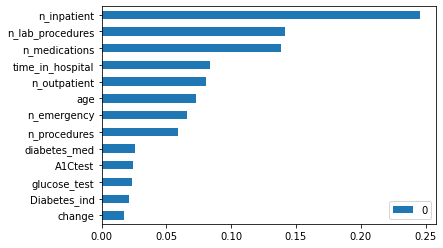

In [223]:
feature_imp.sort_values(by=0,ascending=True).plot(kind='barh')

In [232]:
df_imp=df_log.copy()

In [233]:
df_imp.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,diabetes_med,Diabetes_ind,readmitted
0,4,2.197225,72,0.693147,2.944439,1.098612,0.0,0.0,0.0,0.0,0,0.693147,0,0
1,4,1.386294,34,1.098612,2.639057,0.000000,0.0,0.0,0.0,0.0,0,0.693147,0,0
2,2,1.791759,45,0.000000,2.944439,0.000000,0.0,0.0,0.0,0.0,1,0.693147,0,1
3,4,1.098612,36,0.000000,2.564949,0.693147,0.0,0.0,0.0,0.0,1,0.693147,1,1
4,3,0.693147,42,0.000000,2.079442,0.000000,0.0,0.0,0.0,0.0,0,0.693147,0,0


In [234]:
df_imp=df_imp[['n_inpatient','n_lab_procedures','n_medications','time_in_hospital','n_outpatient','readmitted']]

In [236]:
df_imp.head()

,n_inpatient,n_lab_procedures,n_medications,time_in_hospital,n_outpatient,readmitted
0,0.0,72,2.944439,2.197225,1.098612,0
1,0.0,34,2.639057,1.386294,0.000000,0
2,0.0,45,2.944439,1.791759,0.000000,1
3,0.0,36,2.564949,1.098612,0.693147,1
4,0.0,42,2.079442,0.693147,0.000000,0


In [237]:
X=df_imp.drop('readmitted',axis=1)
y=df_imp['readmitted']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [239]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [240]:
from sklearn.ensemble import RandomForestClassifier
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}
#{'n_estimators': 97, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestClassifier(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)

In [241]:
y_pred = rf.predict(X_test)
print('Training Set:', rf.score(X_train,y_train))
print('Test Set:', rf.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Training Set: 0.6623283582089552
Test Set: 0.6104242424242424
Accuracy: 61.04%


In [243]:
import pickle
filename = 'final_model.pkl'
pickle.dump(rf, open(filename, 'wb'))